In [152]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model


In [153]:
data=pd.read_csv('titanic.csv')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [154]:
from sklearn.preprocessing import LabelEncoder
labelEnco=LabelEncoder()
labedData=data
data['Sex']=labelEnco.fit_transform(labedData['Sex'])
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [155]:
x=data.drop(['PassengerId', 'Survived', 'Name','Ticket', 'Cabin','Embarked','Parch' ], axis='columns')
x['Age']=x.fillna(x['Age'].median())
x.head(10)

,Pclass,Sex,Age,SibSp,Fare
0,3,1,3.0,1,7.2500
1,1,0,1.0,1,71.2833
2,3,0,3.0,0,7.9250
3,1,0,1.0,1,53.1000
4,3,1,3.0,0,8.0500
5,3,1,3.0,0,8.4583
6,1,1,1.0,0,51.8625
7,3,1,3.0,3,21.0750
8,3,0,3.0,0,11.1333
9,2,0,2.0,1,30.0708


In [156]:
y=data.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [157]:
from sklearn import  tree
from sklearn.model_selection import train_test_split
xt,xtest,yt,ytest=train_test_split(x,y, test_size=.2)

In [158]:
model=tree.DecisionTreeClassifier()
model.fit(xt,yt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [159]:
model.predict(xtest)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0])

In [160]:
model.score(xtest,ytest)

0.8268156424581006

In [161]:
y_predicted=model.predict(xtest)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_predicted)

Text(69.0, 0.5, 'Truth')

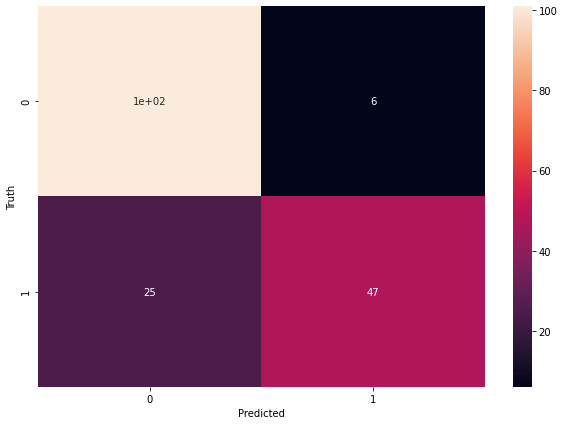

In [162]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')